In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

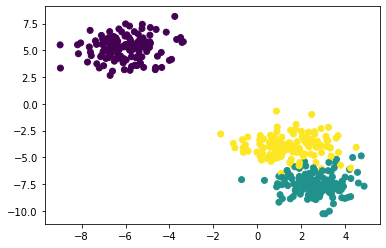

In [2]:
X,y = make_blobs(400,2)
plt.scatter(X[:,0],X[:,1], c=y)

In [3]:
# distance matrix
def func_computeDistanceMatrix(X):
    num_sample = X.shape[0]
    distance_matrix = np.zeros((num_sample,num_sample))
    for i in range(num_sample):
        for j in range(num_sample):
            distance_matrix[i,j] = np.linalg.norm(X[i]-X[j])
    return distance_matrix

# markov normalize
def func_computeMarkovNormalize(distance_matrix):
    return distance_matrix/distance_matrix.sum(axis=1)[:, np.newaxis]

# diffusion
def func_computeDiffusion(markov_matrix, steps):
    for i in range(steps):
        markov_matrix = markov_matrix.dot(markov_matrix)
    return markov_matrix

In [7]:
#distance_matrix_1 = func_computeDistanceMatrix(X)
distance_matrix = squareform(pdist(X, 'euclidean')) 
#print(distance_matrix-distance_matrix_1)
print(distance_matrix.shape)
markov_matrix = func_computeMarkovNormalize(distance_matrix)
print(np.sum(markov_matrix[:,1]))
diffused_markov_matrix = func_computeDiffusion(markov_matrix, steps=20)
print(diffused_markov_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(400, 400)
1.4622428447284594
[[0.00198318 0.00319004 0.00224853 ... 0.00253984 0.00257284 0.00236603]
 [0.00198318 0.00319004 0.00224853 ... 0.00253984 0.00257284 0.00236603]
 [0.00198318 0.00319004 0.00224853 ... 0.00253984 0.00257284 0.00236603]
 ...
 [0.00198318 0.00319004 0.00224853 ... 0.00253984 0.00257284 0.00236603]
 [0.00198318 0.00319004 0.00224853 ... 0.00253984 0.00257284 0.00236603]
 [0.00198318 0.00319004 0.00224853 ... 0.00253984 0.00257284 0.00236603]]
